In [1]:
import pandas as pd

df = pd.read_csv('logistic.csv')
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [2]:
df.drop(columns=['policy_id'], axis=1, inplace=True)
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [3]:
df.isna().sum()

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

In [4]:
df.dtypes

policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object
gear_box                        

In [6]:
obj_cols = df.columns[df.dtypes=='object']
obj_cols

Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder

for i in obj_cols:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])
df.dtypes

policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                          int32
population_density                    int64
make                                  int64
segment                               int32
model                                 int32
fuel_type                             int32
max_torque                            int32
max_power                             int32
engine_type                           int32
airbags                               int64
is_esc                                int32
is_adjustable_steering                int32
is_tpms                               int32
is_parking_sensors                    int32
is_parking_camera                     int32
rear_brakes_type                      int32
displacement                          int64
cylinder                              int64
transmission_type                     int32
gear_box                        

In [8]:
x = df.drop(columns=['is_claim'], axis=1)
y = df['is_claim']

In [25]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,
                                train_size=0.8
                                                ,stratify=y)

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(xtrain, ytrain)
trainpred = model.predict(xtrain)
trainpred[:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [39]:
testpred = model.predict(xtest)
testpred[:5]

array([0, 1, 1, 1, 1], dtype=int64)

In [40]:
from sklearn import metrics

cm = metrics.confusion_matrix(ytrain, trainpred)
cm

array([[18344, 25531],
       [ 1142,  1856]], dtype=int64)

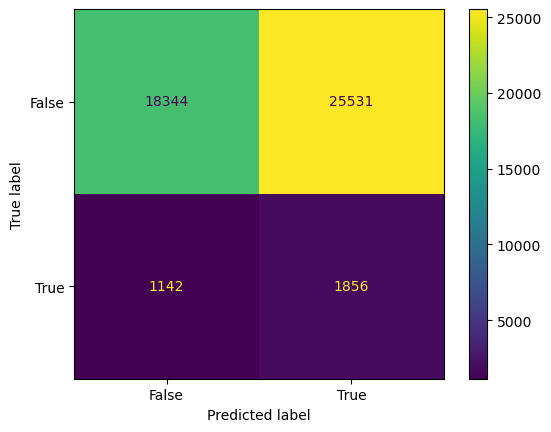

In [41]:
import matplotlib.pyplot as plt
cm_display = metrics.ConfusionMatrixDisplay(
              confusion_matrix = cm,
                        display_labels=[False, True])
cm_display.plot()
plt.show()

In [42]:
metrics.recall_score(ytrain, trainpred)

0.619079386257505

In [43]:
metrics.precision_score(ytrain, trainpred)

0.06776937963267243

In [44]:
metrics.accuracy_score(ytrain, trainpred)

0.4309517206067459

In [45]:
print(metrics.classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

           0       0.94      0.42      0.58     43875
           1       0.07      0.62      0.12      2998

    accuracy                           0.43     46873
   macro avg       0.50      0.52      0.35     46873
weighted avg       0.89      0.43      0.55     46873

